In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Laser settings

Pattern, where the laser is permanently on and writes rows with a high level of overlap.

$$s=v*t \Leftrightarrow t = \frac{s}{v}$$ 
$$ s= a*t^2 \Leftrightarrow t = \sqrt{\frac{s}{a}}$$ where $s=a*t$, therefore $a = \frac{v^2}{s}$



In [2]:
SPEED = 30 # mm/s
INTERVAL = 0.05 # mm
SPOT_SIZE = 2 # mm
sample_width = 10 # mm

time_on = SPOT_SIZE/SPEED
time_off_average = sample_width/SPEED

passes = SPOT_SIZE/INTERVAL
# speed_up_time_pass = np.sqrt()
# time_multi_pass = passes * time_single_pass



print("Time for a single pass: ", time_on, "s")
print("Time off average: ", time_off_average, "s")
# print("Time for a multi pass: ", time_multi_pass, "s")
print(passes)

Time for a single pass:  0.06666666666666667 s
Time off average:  0.3333333333333333 s
40.0


Way too many passes with very long cooling time. Basically, every pass had to start anew melting the PMMA. This resulted in barely embedded particles at speeds where the laser was fast enough to not just instantly evaporate the PMMA.

## Pulsed laser

This pattern consists of a dashed line, where the laser is on for the length of the line and off for the length of the gap between the lines. Because the g0 speed cannot be directly controlled, the amount of time the laser is off, cannot be regulated. Furthermore, as the laser moves faster over the areas where there is no line, the cooling time is actually shorter than the heating time.

In [3]:
# with lightburn pattern
g1 = 6 # mm/s
g0 = 12 # mm/s
on_line = 0.2 # mm
off_line = 0.2 # mm
spot_length = 2.8 # mm

time_on = on_line/g1
passes = spot_length/(on_line+off_line)
time_off = off_line/g0
total_on = time_on * passes

print("Time on: ", time_on, "s")
print("Time off: ", time_off, "s")
print("Passes: ", passes)
print("Total on: ", total_on, "s")

Time on:  0.03333333333333333 s
Time off:  0.016666666666666666 s
Passes:  6.999999999999999
Total on:  0.2333333333333333 s


The extracted on and off times from above were used as the starting point for further experiments with a function generator. The focus distance was changed between the two, so the results are not directly comparable.

In [10]:
from utils import get_func_gen_settings
on_time = 0.030 # s
off_time = 2*on_time # s
passes = 5
focus_distance = 45 # mm

_ = get_func_gen_settings(on_time, off_time, passes, focus_distance, print_settings=True, legacy=False)



Settings:
Set on time: 30 ms
Set off time: 60 ms
Cycles: 5
--------------------
Speed: 6.1 mm/s
Frequency: 11.17 Hz
Duty cycle: 33 %
Total time over spot: 0.45 s
Equivalent energy: 0.84 J/mm^2
--------------------
Actual on time: 30 ms
Total on time: 149 ms
Actual off time: 60 ms
Total off time: 298 ms


7, 9, 3 passes 30 ms

90 ms pulsen 5x
90 ms pulsen 3x
25 3x, 90 5x


    (variation der auszeit
    25 ms, 5 passes, 1 s off
    on 25 ms, no off)
  
variation of focus distance



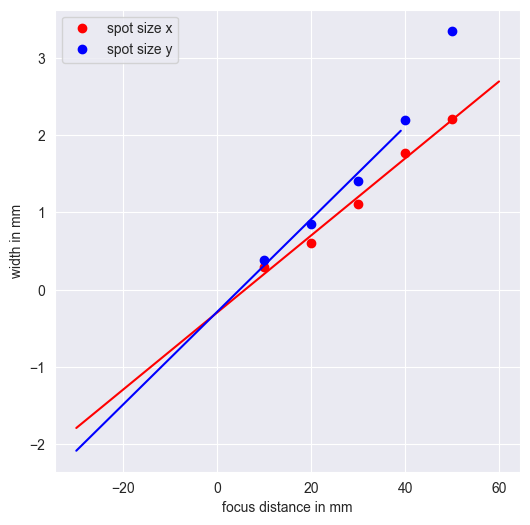

In [5]:
distances = [10, 20, 30, 40, 50]
x_width = [0.3, 0.61, 1.11, 1.77, 2.21]
y_width = [0.39, 0.85, 1.41, 2.2, 3.35]



x = np.array(distances).reshape(-1, 1)
x_fine = np.linspace(-30, 60, 100).reshape(-1, 1)
x_width = np.array(x_width).reshape(-1, 1)
y_width = np.array(y_width).reshape(-1, 1)

model_x = LinearRegression()
model_x.fit(x, x_width)
y_pred_x = model_x.predict(x_fine)

model_y = LinearRegression()
model_y.fit(x, y_width)
y_pred_y = model_y.predict(x_fine)

model_y2 = LinearRegression()
model_y2.fit(x[:-1], y_width[:-1])
x_fine_2 = x_fine[x_fine<40].reshape(-1, 1)
y_pred_y2 = model_y2.predict(x_fine_2)

model_y3 = LinearRegression()
model_y3.fit(x[:-2], y_width[:-2])
x_fine_3 = x_fine[x_fine<30].reshape(-1, 1)
y_pred_y3 = model_y3.predict(x_fine_3)


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.plot(x, x_width, 'o', color='red')
axs.plot(x, y_width, 'o', color='blue')
axs.plot(x_fine, y_pred_x, color='red')
# axs.plot(x_fine, y_pred_y, color='green')
axs.plot(x_fine_2, y_pred_y2, color='blue')
# axs.plot(x_fine_3, y_pred_y3, color='purple')
axs.set_xlabel("focus distance in mm")
axs.set_ylabel("width in mm")
axs.legend(["spot size x", "spot size y"])
plt.savefig("focus_distance.png", dpi=300)
plt.show()


In [8]:
from utils import get_spot_size

get_spot_size(45)

(np.float64(1.95), np.float64(2.73))